# Training First Release Candidate for Model

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from meteo_imp.kalman.fastai import *
from meteo_imp.kalman.filter import *
from meteo_imp.utils import *
from meteo_imp.data import *
from meteo_imp.gaussian import *

from fastai.tabular.learner import *
from fastai.learner import *
from fastai.callback.all import *
from fastcore.foundation import L

from meteo_imp.kalman.fastai import show_results
import pandas as pd
import numpy as np
import torch
import random

from sklearn.decomposition import PCA

In [ ]:
reset_seed()

In [ ]:
haiB = pd.read_parquet(hai_big_path)
hai_eraB = pd.read_parquet(hai_era_big_path)

In [ ]:
list(haiB.columns)

['TA', 'SW_IN', 'VPD', 'PA', 'P', 'WS', 'LW_IN']

In [ ]:
len(haiB.columns)

7

## Variable N var missing

In [ ]:
dlsB = imp_dataloader(haiB, hai_eraB, var_sel = gen_var_sel(list(haiB.columns)), block_len=100, gap_len=10, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
modelB = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns), df_pca = None, pred_only_gap=True, use_conditional=False)

In [ ]:
save_models = SaveModelsBatch(times_epoch=10) # save once per repetition

In [ ]:
import random
items = random.choices(dlsB.valid.items, k=4)

In [ ]:
learnB = Learner(dlsB, modelB, KalmanLoss(only_gap=True), cbs = [Float64Callback, save_models], metrics=rmse_gap)

In [ ]:
modelB.use_smooth = True

In [ ]:
learnB.fit(20, 1e-4)

epoch,train_loss,valid_loss,rmse_gap,time
0,48.411676,51.481414,0.456462,19:13
1,46.855501,31.959075,0.377701,18:01
2,19.846492,18.266001,0.329986,17:54
3,13.052867,8.769645,0.299612,18:11
4,4.029165,0.413176,0.274873,18:08
5,-3.009690,-5.729639,0.256770,18:02
6,-10.692294,-10.487680,0.241552,18:22
7,-13.994195,-14.608254,0.226000,18:15
8,-17.025145,-18.185853,0.210300,18:18
9,-20.115838,-21.388595,0.193009,18:23


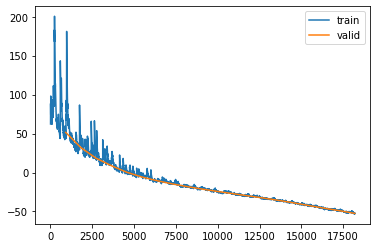

In [ ]:
learnB.recorder.plot_loss()

In [ ]:
torch.save(learnB.model, "trained_2_feb_gap_partial_var_v2.pickle")

In [ ]:
# learnB.export("trained_2_feb_gap_all_var_v1")

In [ ]:
show_results(learnB, items=items, control_map=control_map)

KeyError: "None of [Index(['TA_ERA', 'SW_IN_ERA', 'VPD_ERA', 'PA_ERA', 'P_ERA', 'WS_ERA',\n       'LW_IN_ERA'],\n      dtype='object')] are in the [columns]"

## All Gap

In [ ]:
dls2 = imp_dataloader(haiB, hai_eraB, var_sel = list(haiB.columns), block_len=100, gap_len=10, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
model2 = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns), df_pca = None, pred_only_gap=True, use_conditional=False)

In [ ]:
save_models2 = SaveModelsBatch(times_epoch=1) # save once per epoch

In [ ]:
items = random.choices(dls2.valid.items, k=4)

In [ ]:
learn2 = Learner(dls2, model2, KalmanLoss(only_gap=True), cbs = [Float64Callback, save_models2], metrics=rmse_gap)

In [ ]:
modelB.use_smooth = True

In [ ]:
learn2.fit(20, 1e-4)

epoch,train_loss,valid_loss,rmse_gap,time
0,70.276643,73.909640,0.505258,15:12
1,60.282756,39.872240,0.409351,14:24
2,37.709006,20.074781,0.365104,14:28
3,18.215215,3.965547,0.336784,15:22
4,-7.093520,-7.774671,0.314952,15:00
5,-13.857082,-18.661689,0.288021,16:51
6,-26.175319,-27.904121,0.260224,15:13
7,-35.333468,-35.853093,0.232222,16:54
8,-42.676382,-42.475996,0.207705,15:29
9,-48.136620,-47.801236,0.186707,14:06


In [ ]:
learn2.recorder.plot_loss()

In [ ]:
torch.save(learn2.model, "trained_2_feb_gap_all_var_v1.pickle")

In [ ]:
# learnB.export("trained_2_feb_gap_all_var_v1")

In [ ]:
show_results(learn2, items=items)

### Fast training

try to double the learning rate and see if it still works

In [ ]:
model2_f = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns), df_pca = None, pred_only_gap=True, use_conditional=False)

In [ ]:
save_models2_f = SaveModelsBatch(times_epoch=1) # save once per epoch

In [ ]:
items2_f = random.choices(dls2.valid.items, k=4)

In [ ]:
learn2_f = Learner(dls2, model2_f, KalmanLoss(only_gap=True), cbs = [Float64Callback, save_models2_f], metrics=rmse_gap)

In [ ]:
learn2_f.fit(3, 1e-2)

epoch,train_loss,valid_loss,rmse_gap,time
0,-11.235242,-12.854656,0.297686,14:01
1,-14.011156,-15.982702,0.294317,14:31
2,-13.541236,-16.675112,0.295831,14:35


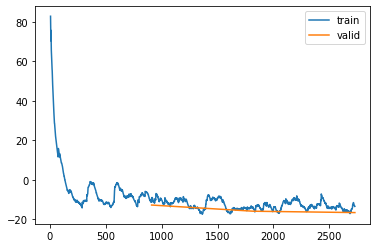

In [ ]:
learn2_f.recorder.plot_loss()

this learning rate is too high

## Conditional

In [ ]:
dls3 = imp_dataloader(haiB, haiB, var_sel = gen_var_sel(list(haiB.columns)), block_len=100, gap_len=10, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
model3 = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns), df_pca = None, pred_only_gap=True, use_conditional=True)

In [ ]:
save_models3 = SaveModelsBatch(times_epoch=1) # save once per repetition

In [ ]:
items = random.choices(dls3.valid.items, k=4)

In [ ]:
learn3 = Learner(dls3, model3, KalmanLoss(only_gap=True), cbs = [Float64Callback, save_models2], metrics=rmse_gap)

In [ ]:
learn3.fit(20, 1e-4)

In [ ]:
learn3.recorder.plot_loss()

In [ ]:
torch.save(learn3.model, "trained_2_feb_gap_partial_var_cond_v1.pickle")

In [ ]:
# learnB.export("trained_2_feb_gap_all_var_v1")

In [ ]:
show_results(learn3, items=items)

## TA - gap 5

In [ ]:
dls_TA = imp_dataloader(haiB, hai_eraB, var_sel = 'TA', block_len=50, gap_len=5, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_TA = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns), df_pca = haiB, pred_only_gap=True, use_conditional=True)

In [ ]:
save_models_TA = SaveModelsBatch(times_epoch=10) # save once per repetition

In [ ]:
items_TA = random.choices(dls_TA.valid.items, k=4)

In [ ]:
learn_TA = Learner(dls_TA, model_TA, KalmanLoss(only_gap=True), cbs = [Float64Callback, save_models_TA], metrics=rmse_gap)

In [ ]:
learn_TA.model = torch.load("trained_3_feb_TA_gap_5_v3.pickle")

In [ ]:
learn_TA.fit(1, 1e-3)

epoch,train_loss,valid_loss,rmse_gap,time
0,-9.491266,-9.823570,0.022367,08:13


In [ ]:
from tqdm.auto import tqdm

In [ ]:
from functools import partial

In [ ]:
errs = []
for inp in tqdm(dls_TA.valid):
    pred = learn_TA.model(inp[0])
    rmse =  learn_TA.metrics[0](pred, inp[1])
    errs.append(rmse)

  0%|          | 0/228 [00:00<?, ?it/s]

In [ ]:
torch.tensor(errs).mean()

tensor(0.0252)

I like thiss error! and is totally consistent with the training one

In [ ]:
items_TA

[MeteoImpItem(i=4518, shift=15, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=3825, shift=5, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=3706, shift=-25, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=4397, shift=15, var_sel=['TA'], gap_len=5)]

In [ ]:
input = one_batch_with_items(dls_TA, items_TA)[0]
preds_raw = learn_TA.model(input)

In [ ]:
learn_TA.metrics[0](preds_raw, input)

0.03817931190133095

this is good because is the same order of magnigute of the average during training

try to compute the normalize mean from the predictions, which should be the same of this one

In [ ]:
def normalize(x, mean, std):
    return (x - mean) / std 

In [ ]:
def inv_normalize(x, mean, std):
    return x * std + mean 

In [ ]:
norm_hai = partial(normalize, mean = get_stats(haiB)[0], std =  get_stats(haiB)[1])

In [ ]:
inv_norm_hai = partial(inv_normalize, mean = get_stats(haiB)[0], std =  get_stats(haiB)[1])

In [ ]:
inv_norm_hai = lambda x: x  * get_stats(haiB)[1] + get_stats(haiB)[0]

In [ ]:
preds, targs = predict_items(model_TA, dls_TA, items_TA)
pred, targ = preds[0], targs[0]

In [ ]:
targ_n = norm_hai(targ.data)

The normalization is correct

In [ ]:
test_close(targ_n.to_numpy(), input[0][0].numpy())

In [ ]:
get_stats(haiB)[0]

tensor([8.3339e+00, 1.2096e+02, 3.3807e+00, 9.5962e+01, 4.3427e-02, 3.1800e+00,
        3.1150e+02], dtype=torch.float64)

In [ ]:
test_close(targ.data.to_numpy(), inv_norm_hai(input[0][0]).numpy())

In [ ]:
preds_r = maybe_buffer_pred(CovStdTransform()(preds_raw), input[1])

In [ ]:
from meteo_imp.kalman.fastai import InverseNormalize

In [ ]:
inv_norm = InverseNormalize(*get_stats(haiB))

In [ ]:
preds_r[0][0][24:30]

tensor([[    nan,     nan,     nan,     nan,     nan,     nan,     nan],
        [-0.5869,     nan,     nan,     nan,     nan,     nan,     nan],
        [-0.5357,     nan,     nan,     nan,     nan,     nan,     nan],
        [-0.4994,     nan,     nan,     nan,     nan,     nan,     nan],
        [-0.4664,     nan,     nan,     nan,     nan,     nan,     nan],
        [-0.4624,     nan,     nan,     nan,     nan,     nan,     nan]],
       dtype=torch.float64)

In [ ]:
inv_norm(preds_r)[0][0][24:30]

tensor([[   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [3.6831,    nan,    nan,    nan,    nan,    nan,    nan],
        [4.0883,    nan,    nan,    nan,    nan,    nan,    nan],
        [4.3760,    nan,    nan,    nan,    nan,    nan,    nan],
        [4.6381,    nan,    nan,    nan,    nan,    nan,    nan],
        [4.6697,    nan,    nan,    nan,    nan,    nan,    nan]],
       dtype=torch.float64)

In [ ]:
test_close(norm_hai(inv_norm_hai(preds_r[0][0][25:30]))[:,0], preds_r[0][0][25:30, 0])

try compute metrics

In [ ]:
from fastcore.basics import *
from sklearn.metrics import mean_squared_error

In [ ]:
#| export
class MaskedMetric:
    def __init__(self, metric): store_attr()
    def __call__(self, item, pred):
        row_sel, col_sel = ~item.mask.all(1), ~item.mask.all(0)
        data, mask, pred = item.data.to_numpy(), item.mask.to_numpy(), pred.to_numpy()
        assert not mask[:, col_sel][row_sel, :].any() # gap is a rectangle
        return self.metric(data[:, col_sel][row_sel, :], pred[:, col_sel][row_sel, :])   

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred, multioutput='raw_values'))

In [ ]:
MaskedMetric(rmse)(targ, pred.mean)

array([0.4065746])

the predictions and the target are quite similar!

In [ ]:
preds_r[0][0][25:30, 0], input[0][0][25:30, 0]

(tensor([-0.5869, -0.5357, -0.4994, -0.4664, -0.4624], dtype=torch.float64),
 tensor([-0.5936, -0.4497, -0.4258, -0.4901, -0.4283], dtype=torch.float64))

In [ ]:
np.sqrt((pred.mean[~targ.mask][25:30]['TA'] - targ.data[~targ.mask][25:30]['TA']).pow(2).mean())

0.4065746042293408

so it seems this computation is correct

In [ ]:
def normalize(x, mean, std): return (x - mean) / std 

In [ ]:
#| export
class NormalizedMetric:
    def __init__(self, metric: MaskedMetric, mean, std): store_attr()
    def __call__(self, item, pred):
        item.data = normalize(item.data, self.mean, self.std)
        pred = normalize(pred, self.mean, self.std)
        # return item, pred
        return self.metric(item, pred)

In [ ]:
targ_n2, pred_n2 = NormalizedMetric(MaskedMetric(rmse), *get_stats(haiB))(targ, pred.mean)

In [ ]:
assert (targ_n - targ_n2.data).eq(0).all().all()

In [ ]:
preds_r[0][0][25:30, 0], pred_n2[25:30]['TA'].to_numpy()

(tensor([-0.5869, -0.5357, -0.4994, -0.4664, -0.4624], dtype=torch.float64),
 array([-0.5762971 , -0.49850062, -0.43485875, -0.39235883, -0.39919187]))

this is wrong!!! they should be same number but they aren't!!!

In [ ]:
norm_hai(inv_norm(preds_r)[0][0][25:30])[:, 0], preds_r[0][0][25:30, 0]

(tensor([-0.5869, -0.5357, -0.4994, -0.4664, -0.4624], dtype=torch.float64),
 tensor([-0.5869, -0.5357, -0.4994, -0.4664, -0.4624], dtype=torch.float64))

In [ ]:
test_close(norm_hai(inv_norm(preds_r)[0][0][25:30])[:, 0], preds_r[0][0][25:30, 0])

so the inverse normalization is working!

In [ ]:
pred.mean[25:30]['TA'].to_numpy()

array([3.76697843, 4.38348529, 4.88782236, 5.22461764, 5.1704685 ])

In [ ]:
inv_norm(preds_r)[0][0][25:30]

tensor([[3.6831,    nan,    nan,    nan,    nan,    nan,    nan],
        [4.0883,    nan,    nan,    nan,    nan,    nan,    nan],
        [4.3760,    nan,    nan,    nan,    nan,    nan,    nan],
        [4.6381,    nan,    nan,    nan,    nan,    nan,    nan],
        [4.6697,    nan,    nan,    nan,    nan,    nan,    nan]],
       dtype=torch.float64)

In [ ]:
test_close(inv_norm.mean_data, get_stats(haiB)[0])

In [ ]:
test_close(inv_norm.std_data, get_stats(haiB)[1])

In [ ]:
test_close(dls_TA.fs[-2].mean_data, get_stats(haiB)[0])

In [ ]:
test_close(dls_TA.fs[-2].std_data, get_stats(haiB)[1])

sooooooo it seems that they are doing the same thing, why is not working

In [ ]:
def predict_items(
    model: KalmanFilterBase,
    dls,
    items: list[list],
    # metric_fn: PredMetrics
):
    input, _ = one_batch_with_items(dls, items)
    preds_0 = model(input)
    preds_1 = CovStdTransform()(preds_0)
    preds_2 = maybe_buffer_pred(preds_1, input[1])
    preds_3 = InverseNormalize.from_dls(dls)(preds_2) # inverse normalize
    targs = orig_target(dls, items)
    preds_5 = preds2df(preds_3, targs)
    
    # metrics = metric_fn(preds_0, input)
    
    return preds_5, targs, #metrics

In [ ]:
preds_5, preds_2, targs__ = predict_items(model_TA, dls_TA, items=items_TA)

In [ ]:
preds_5[0].mean[25:30]

,TA,SW_IN,VPD,PA,P,WS,LW_IN
time,,,,,,,
2012-11-20 03:00:00,3.766978,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-20 03:30:00,4.383485,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-20 04:00:00,4.887822,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-20 04:30:00,5.224618,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-20 05:00:00,5.170468,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
show_as_row(raw = preds_2[0][0][25:30][:,0], inv_norm = inv_norm_hai(preds_2[0][0][25:30])[:,0],
            norm = norm_hai(inv_norm_hai(preds_2[0][0][25:30]))[:,0])

In [ ]:
preds_2[0][0][25:30][:,0], norm_hai(targs__[0].data)[25:30].to_numpy()[:,0]

(tensor([-0.5763, -0.4985, -0.4349, -0.3924, -0.3992], dtype=torch.float64),
 array([-0.5935823 , -0.44972665, -0.42575071, -0.49010718, -0.42827449]))

In [ ]:
rmse(preds_2[0][0][25:30][:,0], norm_hai(targs__[0].data)[25:30].to_numpy()[:,0])

array([0.05130531])

In [ ]:
NormalizedMetric(MaskedMetric(rmse), *get_stats(haiB))(targs__[0], pd.DataFrame(inv_norm_hai(preds_2[0][0])))

array([0.65475637])

#### Test

test that the normalized metrics are correct

the steps are:
1) get a raw prediction
2) compute rmse on raw prediction
3) get transformed prediction
4) computed normalized rmse on transformed prediction
5) compared raw rmse and normalized rmse

In [ ]:
input = one_batch_with_items(dls_TA, [items_TA[0]])[0]
preds_raw = learn_TA.model(input)
rmse_raw = learn_TA.metrics[0](preds_raw, input)

In [ ]:
rmse_raw

0.05404151976108551

In [ ]:
preds, targs = predict_items(learn_TA.model, dls_TA, [items_TA[0]]) 

In [ ]:
rmse_norm = NormalizedMetric(MaskedMetric(rmse), *get_stats(haiB))( targs[0], preds[0].mean)

In [ ]:
rmse_norm

array([0.05404152])

In [ ]:
test_close(rmse_norm, rmse_raw)

In [ ]:
rmse(preds_2[0][0][25:30]

In [ ]:
assert (targ_n - pred).eq(0).all().all()

In [ ]:
(preds_r[0][0][25:30, 0] - input[0][0][25:30, 0]).pow(2).mean().sqrt()

tensor(0.0540, dtype=torch.float64)

In [ ]:
inv_norm_hai(preds_r_m[0])

tensor([[   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
        [ 

In [ ]:
pred

,TA,SW_IN,VPD,PA,P,WS,LW_IN
time,,,,,,,
2012-11-19 14:30:00,nan,nan,nan,nan,nan,nan,nan
2012-11-19 15:00:00,nan,nan,nan,nan,nan,nan,nan
2012-11-19 15:30:00,nan,nan,nan,nan,nan,nan,nan
2012-11-19 16:00:00,nan,nan,nan,nan,nan,nan,nan
2012-11-19 16:30:00,nan,nan,nan,nan,nan,nan,nan
2012-11-19 17:00:00,nan,nan,nan,nan,nan,nan,nan
2012-11-19 17:30:00,nan,nan,nan,nan,nan,nan,nan
2012-11-19 18:00:00,nan,nan,nan,nan,nan,nan,nan
2012-11-19 18:30:00,nan,nan,nan,nan,nan,nan,nan


In [ ]:
test_close(normalize(targs[0].data, 

In [ ]:
p = preds[0][0]

In [ ]:
pk = p.mean[~input[1][0].numpy()]

In [ ]:
tk = targ[0].data[~input[1][0].numpy()]

In [ ]:
pn = normalize(pk, *get_stats(haiB))

In [ ]:
tn = normalize(tk, *get_stats(haiB))

In [ ]:
np.sqrt((pk - tk).pow(2).mean())

TA       0.406575
SW_IN         NaN
VPD           NaN
PA            NaN
P             NaN
WS            NaN
LW_IN         NaN
dtype: float64

In [ ]:
np.sqrt((pn - tn).pow(2).mean())

TA       0.051305
SW_IN         NaN
VPD           NaN
PA            NaN
P             NaN
WS            NaN
LW_IN         NaN
dtype: float64

In [ ]:
get_stats(haiB)[0]

tensor([8.3339e+00, 1.2096e+02, 3.3807e+00, 9.5962e+01, 4.3427e-02, 3.1800e+00,
        3.1150e+02], dtype=torch.float64)

In [ ]:
dls_TA.fs[4].mean_data[0]

tensor(8.3339, dtype=torch.float64)

In [ ]:
#| export
class ImpMetric(AvgMetric):
    def __init__(self, metric, base_name, only_gap=False, flatten=False):
        store_attr()
    @property
    def name(self): return  self.base_name + ("_gap" if self.only_gap else "")
    def _metric_batch(self, pred, targ):
        return self.metric(pred, targ)
    def _metric_batch_gap(self, pred_list, targ, mask):
        targ, mask = get_only_gap(mask, targ, mask)
        assert len(pred_list) == len(targ)
        pred = torch.vstack(pred_list) # convert to tensor
        row_sel, col_sel = ~mask.all(1), ~mask.all(0)
        assert not mask[:, col_sel][row_sel, :].any(), "More than 1 gap uniform not supported"
        return self.metric(pred[:, col_sel[col_sel]][row_sel, :], targ[:, col_sel][row_sel, :])
    def __call__(self, *args): return self.func(*args)
    def func(self, pred: NormalsParams, targ: MeteoImpTensor):
        mean, _ = pred
        data, mask, _ = targ
        metric_values = torch.empty(len(mean))
        for i in range(metric_values.shape[0]):
            metric_values[i] = (self._metric_batch_gap(mean[i], data[i], mask[i]) if self.only_gap
            else self._metric_batch(mean[i], data[i]))
        return metric_values.mean().item()
    

In [ ]:
input, _ = one_batch_with_items(dls_TA, dls_TA.items)

In [ ]:
preds = learn_TA.model(input)

In [ ]:
learn_TA.metrics[0]

<meteo_imp.kalman.fastai.ImpMetric>

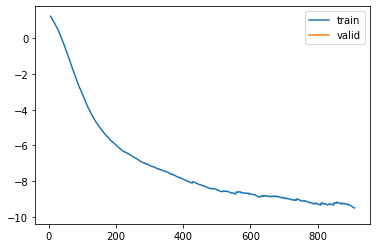

In [ ]:
learn_TA.recorder.plot_loss()

In [ ]:
# torch.save(learn_TA.model, "trained_3_feb_TA_gap_5_v3.pickle")

In [ ]:
# learnB.export("trained_2_feb_gap_all_var_v1")

In [ ]:
step_plots = save_models_TA.show_results(learn_TA, items= items_TA, hide_no_gap=True, control_map=control_map)

/home/simone/anaconda3/envs/data-science/lib/python3.10/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (__class__) that exists in the learner. Use `self.learn.__class__` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
items_TA

[MeteoImpItem(i=3877, shift=15, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=3922, shift=-25, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=4076, shift=5, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=4462, shift=15, var_sel=['TA'], gap_len=5)]

In [ ]:
InteractiveSequence(step_plots)()

Output()

In [ ]:
items0 = [MeteoImpItem(i=3941, shift=5, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=3944, shift=-15, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=3869, shift=-25, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=4310, shift=-25, var_sel=['TA'], gap_len=5)]

In [ ]:
items0[0] = items_TA[0]

In [ ]:
show_results(learn_TA, items=items_TA, hide_no_gap=True, control_map=control_map)

alt.HConcatChart(...)

In [ ]:
show_results(learn_TA, items=items0, hide_no_gap=True, control_map=control_map)

[MeteoImpItem(i=3941, shift=5, var_sel=['TA'], gap_len=5), MeteoImpItem(i=3944, shift=-15, var_sel=['TA'], gap_len=5), MeteoImpItem(i=3869, shift=-25, var_sel=['TA'], gap_len=5), MeteoImpItem(i=4310, shift=-25, var_sel=['TA'], gap_len=5)]


alt.HConcatChart(...)

In [ ]:
items0

[MeteoImpItem(i=3941, shift=5, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=3944, shift=-15, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=3869, shift=-25, var_sel=['TA'], gap_len=5),
 MeteoImpItem(i=4310, shift=-25, var_sel=['TA'], gap_len=5)]

In [ ]:
cg = CustomGap(learn_TA, haiB, hai_eraB)

In [ ]:
L(random.choices(dls_TA.items, k=5)).attrgot('i')

(#5) [2787,1784,334,1234,209]

In [ ]:
cg.interact_results()

interactive(children=(IntSlider(value=10, description='gap_len', min=1), Text(value='10, 100', description='it…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [ ]:
show_results(learn_TA, hide_no_gap=True, control_map=control_map)

In [ ]:
reset_seed()

In [ ]:
show_results(learn_TA, hide_no_gap=True, control_map=control_map)

[MeteoImpItem(i=3706, shift=-25, var_sel=['TA'], gap_len=5), MeteoImpItem(i=4397, shift=15, var_sel=['TA'], gap_len=5), MeteoImpItem(i=3950, shift=-25, var_sel=['TA'], gap_len=5)]


alt.HConcatChart(...)

In [ ]:
preds_k, _ = predict_items(learn_TA.model, dls = dls_TA, items=items_TA)

In [ ]:
preds_k = get_results(learn_TA, items=items_TA)

In [ ]:
targ = orig_target(dls_TA, items_TA)

In [ ]:
from fastcore.basics import *
from sklearn.metrics import mean_squared_error

In [ ]:
#| export
class MaskedMetric:
    def __init__(self, metric): store_attr()
    def __call__(self, item, pred):
        row_sel, col_sel = ~item.mask.all(1), ~item.mask.all(0)
        data, mask, pred = item.data.to_numpy(), item.mask.to_numpy(), pred.to_numpy()
        assert not mask[:, col_sel][row_sel, :].any() # gap is a rectangle
        return self.metric(data[:, col_sel][row_sel, :], pred[:, col_sel][row_sel, :])   

In [ ]:
#| export
class NormalizedMetric:
    def __init__(self, metric, mean, std):
        self.metric = metric
        self.mean, self.std = mean.numpy(), std.numpy()
    def __call__(self, item, pred):
        row_sel, col_sel = ~item.mask.all(1), ~item.mask.all(0)
        data, mask, pred = item.data.to_numpy(), item.mask.to_numpy(), pred.to_numpy()
        n_data = (data - self.mean) / self.std
        n_pred = (pred - self.mean) / self.std
        assert not mask[:, col_sel][row_sel, :].any() # gap is a rectangle
        return self.metric(n_data[:, col_sel][row_sel, :], n_pred[:, col_sel][row_sel, :])   

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred, multioutput='raw_values'))

In [ ]:
#| export
class NormalizedMetric:
    def __init__(self, metric, mean, std):
        self.metric = metric
        self.mean, self.std = mean.numpy(), std.numpy()
    def __call__(self, item, pred):
        row_sel, col_sel = ~item.mask.all(1), ~item.mask.all(0)
        data, mask, pred = item.data.to_numpy(), item.mask.to_numpy(), pred.to_numpy()
        n_data = (data - self.mean) / self.std
        n_pred = (pred - self.mean) / self.std
        assert not mask[:, col_sel][row_sel, :].any() # gap is a rectangle
        return self.metric(n_data[:, col_sel][row_sel, :], n_pred[:, col_sel][row_sel, :])   

In [ ]:
MaskedMetric(rmse)(targ[0], preds_k[0][0].mean)

array([0.428258])

In [ ]:
class ERAImputation:
    name = "ERA"
    def __call__(self, item):
        pred = item.control.copy()
        names = [col for col in pred.columns if not col.endswith("_lag_1")]
        pred = pred.filter(names)
        return pred.rename(columns=lambda x: x.replace("_ERA", ""))

In [ ]:
pred_era = ERAImputation()(targ[0])
pred_era.head(), targ[0].control.head()

(                        TA    SW_IN    VPD      PA    P     WS    LW_IN
 time                                                                   
 2012-11-19 14:30:00  6.281  102.451  1.039  96.220  0.0  1.635  314.377
 2012-11-19 15:00:00  5.998   82.679  0.985  96.215  0.0  1.671  314.377
 2012-11-19 15:30:00  5.716   59.594  0.931  96.210  0.0  1.707  314.377
 2012-11-19 16:00:00  5.434   33.592  0.877  96.204  0.0  1.742  314.377
 2012-11-19 16:30:00  5.152    1.620  0.823  96.199  0.0  1.778  304.538,
                      TA_ERA  SW_IN_ERA  VPD_ERA  PA_ERA  P_ERA  WS_ERA  \
 time                                                                     
 2012-11-19 14:30:00   6.281    102.451    1.039  96.220    0.0   1.635   
 2012-11-19 15:00:00   5.998     82.679    0.985  96.215    0.0   1.671   
 2012-11-19 15:30:00   5.716     59.594    0.931  96.210    0.0   1.707   
 2012-11-19 16:00:00   5.434     33.592    0.877  96.204    0.0   1.742   
 2012-11-19 16:30:00   5.152      1.62

In [ ]:
MaskedMetric(rmse)(targ[0], pred_era)

array([0.24196611])

In [ ]:
import polars as pl

In [ ]:
learn_TA.model.use_conditional = False

In [ ]:
def comp_error(n):
    items_TA_ = random.choices(dls_TA.valid.items, k=n) if n is not None else dls_TA.valid.items
    out = []
    targs = orig_target(dls_TA, items_TA_)
    norm_rmse = NormalizedMetric(rmse, *get_stats(haiB))
    for item, targ in zip(items_TA, targs):
        pred_era = ERAImputation()(targ)
        preds_k, _ = predict_items(learn_TA.model, dls = dls_TA, items=[item])
        pred_k = preds_k[0].mean
        for name, pred in zip(['Kalman', 'ERA'], [pred_k, pred_era]):
            out.append(
            {'method': name,
             'rmse': MaskedMetric(rmse)(targ, pred).item(),
             'rmse_norm': norm_rmse(targ, pred).item(),
             'item': tuple(item),
             # 'rmse_norm': self.rmse_norm(item, pred).item(),
             # 'var': var,
             # 'gap_len': gap_len
            }
            )
    out = pd.DataFrame(out)
    return out.groupby('method').aggregate({'rmse': ['mean', 'std'], 'rmse_norm': ['mean', 'std']})

In [ ]:
comp_error(5)

rmse           rmse_norm          
            mean       std      mean       std
method                                        
ERA     0.906682  0.888673  0.114414  0.112141
Kalman  8.204769  7.849606  1.035353  0.990535

In [ ]:
comp_error(None)

rmse           rmse_norm          
            mean       std      mean       std
method                                        
ERA     2.724613  1.969271  0.343817  0.248501
Kalman  7.380443  5.254880  0.931332  0.663109

In [ ]:
comp_error(1000)

rmse          
            mean       std
method                    
ERA     1.773263  1.487354
Kalman  5.935207  4.806449

In [ ]:
comp_error(10)

rmse          
            mean       std
method                    
ERA     1.034524  1.411873
Kalman  7.834899  3.228180

In [ ]:
with only_gap_ctx(learn_TA, False):
    display(show_results(learn_TA, items=items_TA, hide_no_gap=True, control_map=control_map))

alt.HConcatChart(...)

In [ ]:
CustomGap(learn_TA, df = haiB, control = hai_eraB)

In [ ]:
model2 = torch.load("trained_2_feb_gap_all_var_v1.pickle")

In [ ]:
model2.use_conditional

In [ ]:
# model2 = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns), df_pca = None, pred_only_gap=True, use_conditional=False)
# model2.load_state_dict(model0_state)
learn2 = Learner(dlsB, model2, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=rmse_gap)

In [ ]:
learn2.fit(4, 1e-4)

In [ ]:
learnB.recorder.plot_loss()

In [ ]:
show_results(learnB)

In [ ]:
from meteo_imp.data import control_map

In [ ]:
with only_gap_ctx(learnB, False):
    display(show_results(learnB, items = items, control_map = control_map))